In [58]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T

import pandas as pd
import matplotlib.pyplot as plt

In [39]:
spark = SparkSession.builder.appName("test").getOrCreate()

In [40]:
df = spark.read.format("csv").option("header","true").load("sales_data.csv")

In [41]:
df.count()

150

In [42]:
df.select("Товар").distinct().count()

24

In [43]:
df.select("Магазин").distinct().count()

13

In [44]:
df.agg(
    F.min("Дата").alias("Мин Дата"),
    F.max("Дата").alias("Макс Дата")
).show()

+----------+----------+
|  Мин Дата| Макс Дата|
+----------+----------+
|2022-09-30|2023-09-30|
+----------+----------+



In [45]:
df.agg(
    F.round(F.sum("Сумма"),2).alias("Сумма")
).show()

+--------+
|   Сумма|
+--------+
|196496.5|
+--------+



In [46]:
df.groupBy("Товар").agg(
    F.sum("Количество").alias("Общее количество продаж")
).orderBy(
    F.col("Общее количество продаж").desc()
).show(5)

+------------+-----------------------+
|       Товар|Общее количество продаж|
+------------+-----------------------+
|      growth|                  346.0|
|        feel|                  306.0|
|       under|                  257.0|
|relationship|                  254.0|
|        mean|                  252.0|
+------------+-----------------------+
only showing top 5 rows



In [50]:
df.groupBy("Магазин").agg(
    F.round(F.sum("Сумма"),2).alias("Общая сумма продаж")
).orderBy(
    F.col("Общая сумма продаж").desc()
).show(1)

+----------+------------------+
|   Магазин|Общая сумма продаж|
+----------+------------------+
|Parker PLC|          23884.44|
+----------+------------------+
only showing top 1 row



In [60]:
df_pd = df.groupBy(
    F.month("Дата").alias("Месяц"),
    F.col("Магазин")
).agg(
    F.sum("Количество").alias("Кол-во продаж")
).orderBy(
    "Месяц",
    F.col("Кол-во продаж").desc()
).toPandas()

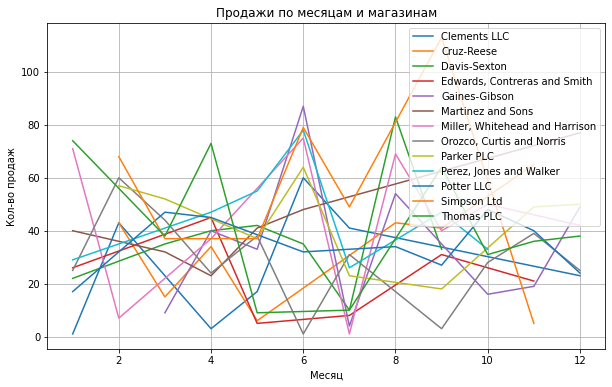

In [61]:
plt.figure(figsize=(10, 6))  # Установите размер графика
for shop, data in df_pd.groupby("Магазин"):
    plt.plot(data["Месяц"], data["Кол-во продаж"], label=shop)

plt.xlabel("Месяц")
plt.ylabel("Кол-во продаж")
plt.title("Продажи по месяцам и магазинам")
plt.legend()
plt.grid(True)

plt.show()

In [62]:
!pwd

/home/jovyan
